In [29]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.stats as sts
from scipy.stats.stats import pearsonr
from sklearn.linear_model import LinearRegression
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
#reading the data
youtube= pd.read_csv('cleaned_yt_us.csv.txt')


In [25]:
youtube.head(5)

,Unnamed: 0,video_id,title,publishedAt,channelTitle,categoryId,trending_date,view_count,likes,dislikes,comment_count,Video_Category,totalwords,title_wordcount
0,0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,Brawadis,22,2020-08-12T00:00:00Z,1514614,156908,5855,35313,Comedy,66991,7
1,1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,Apex Legends,20,2020-08-12T00:00:00Z,2381688,146739,2794,16549,Action/Adventure,66991,10
2,2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,jacksepticeye,24,2020-08-12T00:00:00Z,2038853,353787,2628,40221,Drama,66991,11
3,3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,XXL,10,2020-08-12T00:00:00Z,496771,23251,1856,7647,People & Blogs,66991,8
4,4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,Mr. Kate,26,2020-08-12T00:00:00Z,1123889,45802,964,2196,Foreign,66991,9


In [6]:
#adding a column in the youtbe dataset to count the numeber of words in the title
#counting spaces and adding 1 to it
youtube['title_wordcount'] = youtube['title'].str.count(' ') + 1

The original string is : Geeksforgeeks,    is best @# Computer Science Portal.!!!
The number of words in string are : 6


In [18]:
#youtube.head(5)

<AxesSubplot:xlabel='likes', ylabel='view_count'>

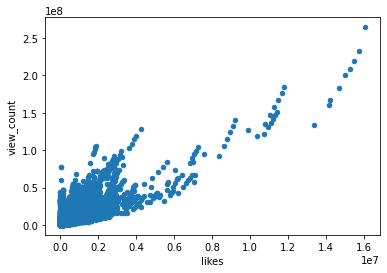

In [22]:
youtube.plot.scatter(x='likes', y='view_count')
#As likes are increasing, view count is increasing as well

<AxesSubplot:xlabel='dislikes', ylabel='view_count'>

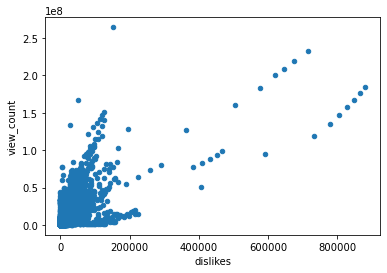

In [23]:
youtube.plot.scatter(x='dislikes', y='view_count')
#surprisingly when dislikes are increasing, view count is increasing as well
#this shows that engagement of any kind is beneficial irespective of likes or dislikes

<AxesSubplot:xlabel='comment_count', ylabel='view_count'>

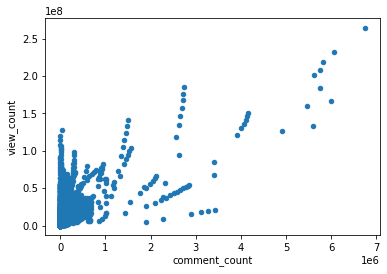

In [24]:
youtube.plot.scatter(x='comment_count', y='view_count')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

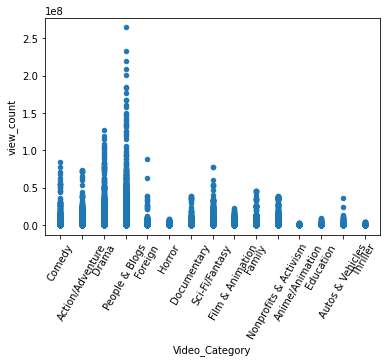

In [27]:
youtube.plot.scatter(x='Video_Category', y='view_count')
plt.xticks(rotation=60)
#people and blogs are the most viewed category

<AxesSubplot:xlabel='title_wordcount', ylabel='view_count'>

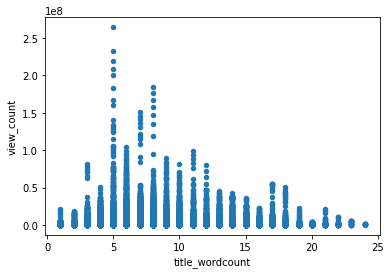

In [28]:
youtube.plot.scatter(x='title_wordcount', y='view_count')
#we can see that title count with 5 words is showing better views. This is an interesting finding as
#title of the video also plays an important part in getting more views
#more verbose titles like with 25 words is generating lesser views and same goes for 1-4 words

In [33]:
import statsmodels.formula.api as smf

In [44]:
#Finding which variables are essential in view count with the help of regression
mr1= smf.ols('view_count ~ title_wordcount + likes + dislikes+ comment_count+ Video_Category', youtube).fit()
print(mr1.summary())
#all the variables seem to play an important part in determining the view_counts
#In categories, Education, Film and Animation and Thriller seem to be insignificant for the view counts


                            OLS Regression Results                            
Dep. Variable:             view_count   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                 1.133e+04
Date:                Sun, 24 Apr 2022   Prob (F-statistic):               0.00
Time:                        18:07:54   Log-Likelihood:            -1.1003e+06
No. Observations:               66991   AIC:                         2.201e+06
Df Residuals:                   66972   BIC:                         2.201e+06
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------